In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data=pd.read_csv('../datasets/Housing Prices Kaggle/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train=data[0:1315]
df_validate=data[1315:1460]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 81 columns):
Id               1315 non-null int64
MSSubClass       1315 non-null int64
MSZoning         1315 non-null object
LotFrontage      1082 non-null float64
LotArea          1315 non-null int64
Street           1315 non-null object
Alley            77 non-null object
LotShape         1315 non-null object
LandContour      1315 non-null object
Utilities        1315 non-null object
LotConfig        1315 non-null object
LandSlope        1315 non-null object
Neighborhood     1315 non-null object
Condition1       1315 non-null object
Condition2       1315 non-null object
BldgType         1315 non-null object
HouseStyle       1315 non-null object
OverallQual      1315 non-null int64
OverallCond      1315 non-null int64
YearBuilt        1315 non-null int64
YearRemodAdd     1315 non-null int64
RoofStyle        1315 non-null object
RoofMatl         1315 non-null object
Exterior1st      1315 non-n

(array([545., 140., 325.,  86.,  47.,  78.,   0.,   0.,  58.,  36.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <a list of 10 Patch objects>)

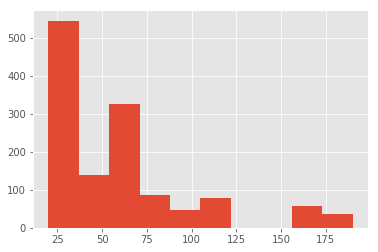

In [142]:
plt.hist(df_train['MSSubClass'])#bins=range(15,195,20))
#plt.xlim(120,200)



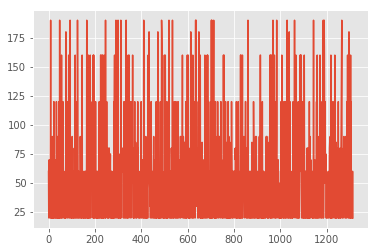

In [6]:
plt.plot(df_train['MSSubClass'])

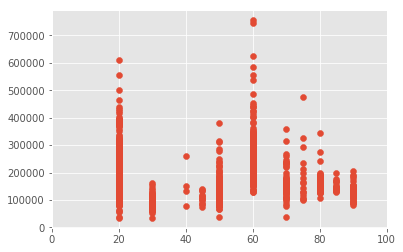

In [12]:
plt.scatter(x=df_train['MSSubClass'],y=df_train['SalePrice'],)
plt.xlim(0,100)
plt.show()


(array([  10.,    0.,   58.,    0.,    0.,   15.,    0., 1041.,    0.,
         191.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

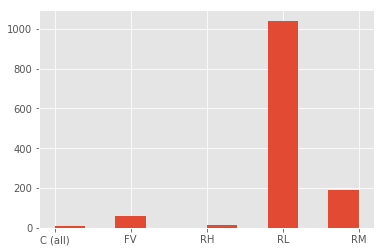

In [27]:
plt.hist(df_train['MSZoning'])

In [28]:
df_train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

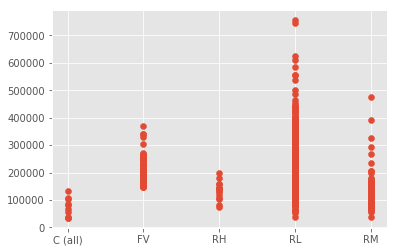

In [29]:
plt.scatter(x=df_train['MSZoning'],y=df_train['SalePrice'])

In [31]:
df_train['house_zone']=df_train['MSSubClass'].map(str)+df_train['MSZoning']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_zone
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,60RL
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,20RL
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,60RL
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,70RL
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,60RL


In [33]:
df_train['house_zone'].unique()

array(['60RL', '20RL', '70RL', '50RL', '50RM', '190RL', '45RM', '90RL',
       '120RM', '30RM', '70C (all)', '120RL', '85RL', '20FV', '190RM',
       '90RM', '80RL', '160FV', '75RM', '70RM', '180RM', '50C (all)',
       '30RL', '190C (all)', '60FV', '20RM', '160RM', '45RL', '40RM',
       '160RL', '75RL', '20RH', '45RH', '60RM', '30C (all)', '120RH',
       '190RH', '70RH', '50RH', '120FV', '90RH', '20C (all)', '40RL'],
      dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text xticklabel objects>)

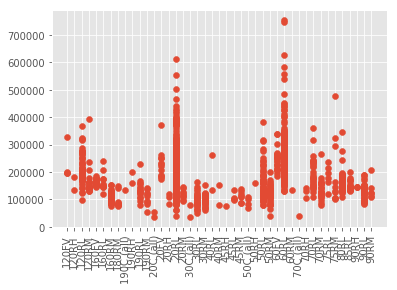

In [35]:
plt.scatter(y=df_train['SalePrice'],x=df_train['house_zone'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text xticklabel objects>)

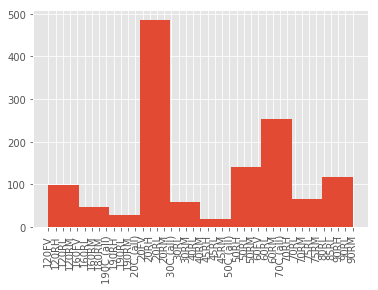

In [39]:
###$$$plt.hist(df_train['house_zone'])
#plt.xticks(rotation=90)

In [47]:
len(df_train['LotFrontage'].unique())

109

In [52]:
(df_train['Street'].unique())

array(['Pave', 'Grvl'], dtype=object)

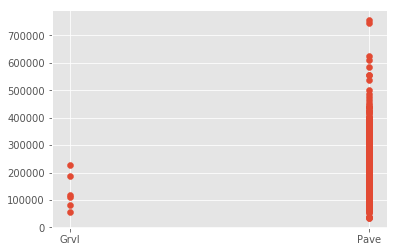

In [59]:
plt.scatter(y=df_train['SalePrice'],x=df_train['Street'])
plt.show()

(array([   6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1309.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

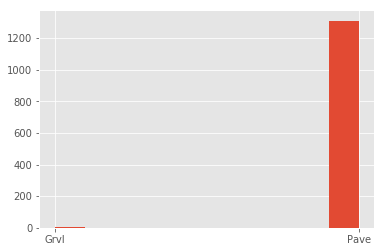

In [60]:
#plt.hist(df_train['Street'])

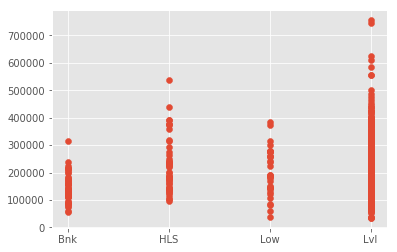

In [61]:
plt.scatter(x=df_train['LandContour'],y=df_train['SalePrice'])

(array([  54.,    0.,    0.,   45.,    0.,    0.,   33.,    0.,    0.,
        1183.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

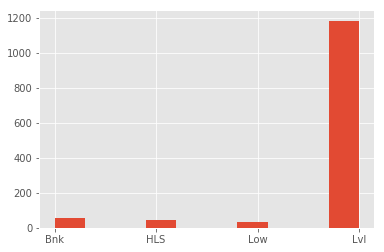

In [62]:
#plt.hist(df_train['LandContour'])

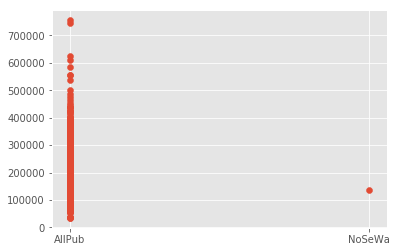

In [63]:
plt.scatter(x=df_train['Utilities'],y=df_train['SalePrice'])

In [64]:
df_train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

(0, 10)

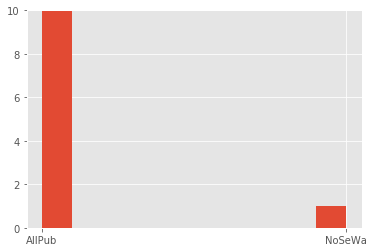

In [69]:
#plt.hist(df_train['Utilities'])
#plt.ylim(0,10)

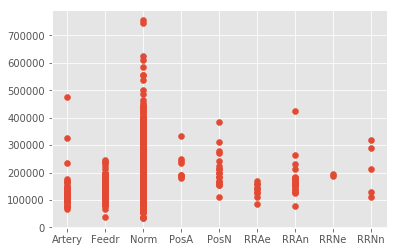

In [70]:
plt.scatter(x=df_train['Condition1'],y=df_train['SalePrice'])

(array([  42.,   76., 1131.,    8.,    0.,   18.,   10.,   23.,    2.,
           5.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

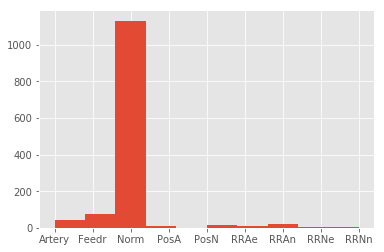

In [71]:
##$plt.hist(df_train['Condition1'])

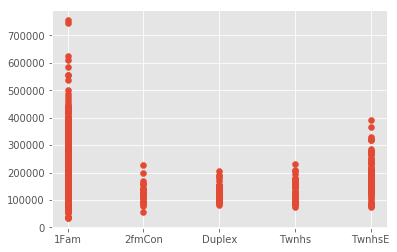

In [72]:
plt.scatter(x=df_train['BldgType'],y=df_train['SalePrice'])

(array([1098.,    0.,   29.,    0.,    0.,   47.,    0.,   40.,    0.,
         101.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

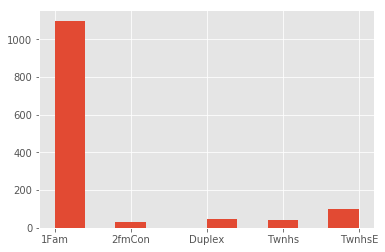

In [74]:
#plt.hist(df_train['BldgType'])

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 82 columns):
Id               1315 non-null int64
MSSubClass       1315 non-null int64
MSZoning         1315 non-null object
LotFrontage      1082 non-null float64
LotArea          1315 non-null int64
Street           1315 non-null object
Alley            77 non-null object
LotShape         1315 non-null object
LandContour      1315 non-null object
Utilities        1315 non-null object
LotConfig        1315 non-null object
LandSlope        1315 non-null object
Neighborhood     1315 non-null object
Condition1       1315 non-null object
Condition2       1315 non-null object
BldgType         1315 non-null object
HouseStyle       1315 non-null object
OverallQual      1315 non-null int64
OverallCond      1315 non-null int64
YearBuilt        1315 non-null int64
YearRemodAdd     1315 non-null int64
RoofStyle        1315 non-null object
RoofMatl         1315 non-null object
Exterior1st      1315 non-n

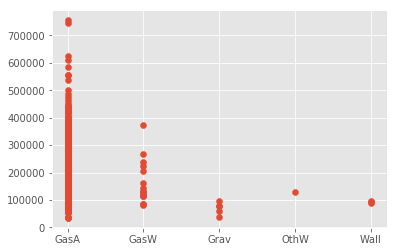

In [80]:
plt.scatter(x=df_train['Heating'],y=df_train['SalePrice'])

(array([1.29e+03, 0.00e+00, 1.60e+01, 0.00e+00, 0.00e+00, 5.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 3.00e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

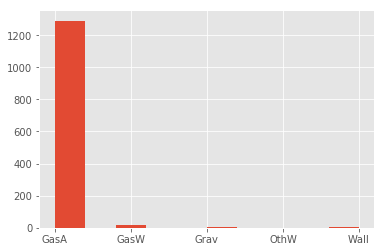

In [81]:
#$plt.hist(df_train['Heating'])

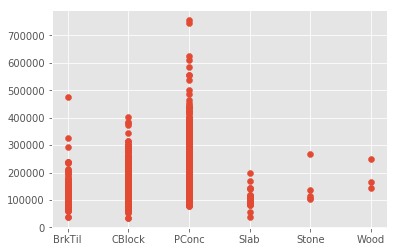

In [83]:
plt.scatter(x=df_train['Foundation'],y=df_train['SalePrice'])

(array([122.,   0., 577.,   0., 585.,   0.,  23.,   0.,   5.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

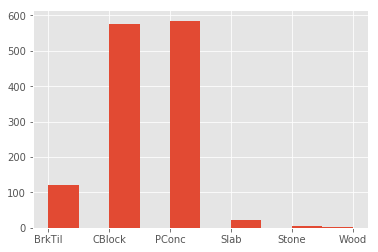

In [84]:
###$$plt.hist(df_train['Foundation'])

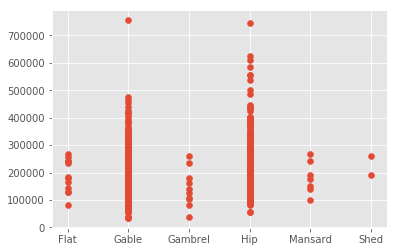

In [85]:
plt.scatter(df_train['RoofStyle'],df_train['SalePrice'])

(array([  12.,    0., 1024.,    0.,   10.,    0.,  260.,    0.,    7.,
           2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

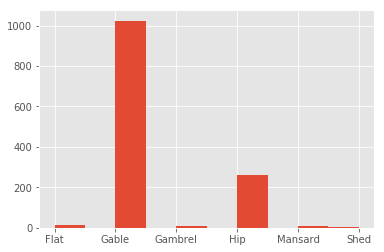

In [87]:
##$$plt.hist(df_train['RoofStyle'])

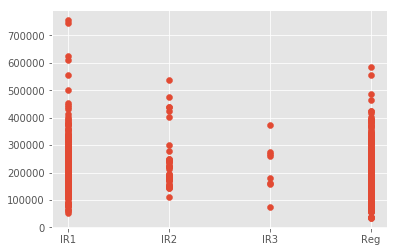

In [90]:
plt.scatter(x=df_train['LotShape'],y=df_train['SalePrice'])

(array([442.,   0.,   0.,  38.,   0.,   0.,   8.,   0.,   0., 827.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

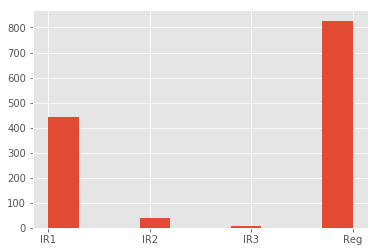

In [91]:
#plt.hist(df_train['LotShape'])

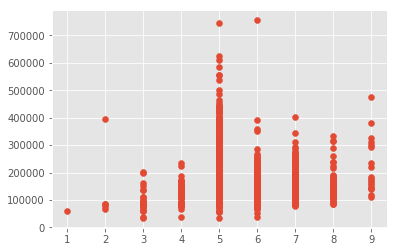

In [93]:
plt.scatter(x=df_train['OverallCond'],y=df_train['SalePrice'])

(array([  1.,   5.,  23.,  51.,   0., 741., 223., 184.,  69.,  18.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

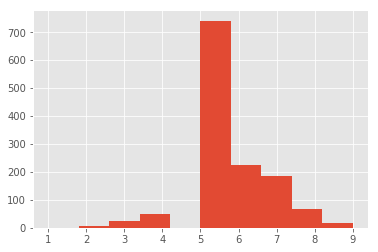

In [94]:
##$plt.hist(df_train['OverallCond'])

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

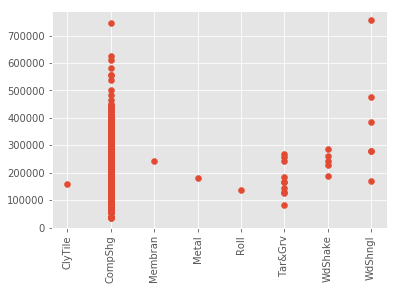

In [98]:
plt.scatter(x=df_train['RoofMatl'],y=df_train['SalePrice'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

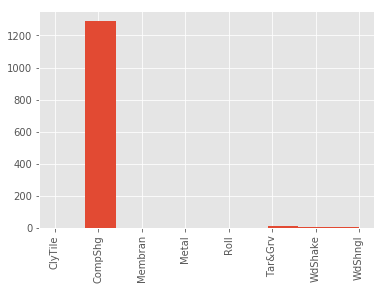

In [104]:
##$$plt.hist(df_train['RoofMatl'])
#plt.xticks(rotation=90)
#plt.ylim(0,10)

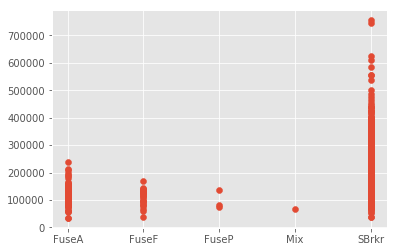

In [105]:
plt.scatter(x=df_train['Electrical'],y=df_train['SalePrice'])

(array([8.800e+01, 0.000e+00, 2.400e+01, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.199e+03]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

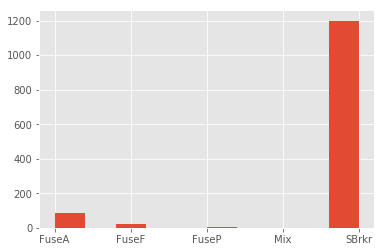

In [107]:
#plt.hist(df_train['Electrical'])


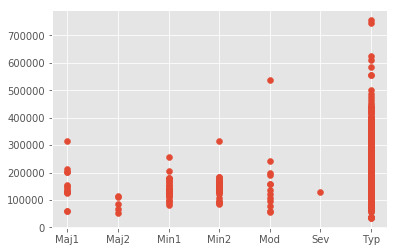

In [108]:
plt.scatter(x=df_train['Functional'],y=df_train['SalePrice'])

(array([1.400e+01, 5.000e+00, 0.000e+00, 2.500e+01, 0.000e+00, 3.100e+01,
        1.300e+01, 0.000e+00, 1.000e+00, 1.226e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

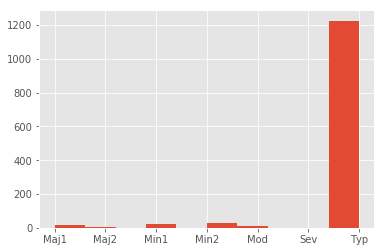

In [109]:
#$plt.hist(df_train['Functional'])

In [111]:
df_train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

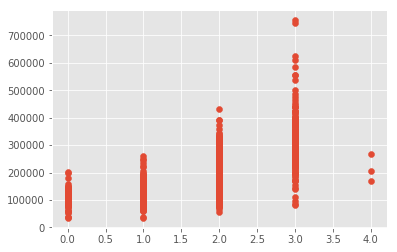

In [112]:
plt.scatter(x=df_train['GarageCars'],y=df_train['SalePrice'])


(array([ 72.,   0., 333.,   0.,   0., 748.,   0., 159.,   0.,   3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

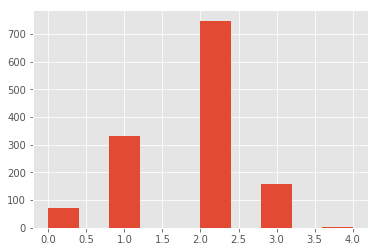

In [114]:
##$$$plt.hist(df_train['GarageCars'])

In [116]:
len(df_train['GarageYrBlt'].unique())

96

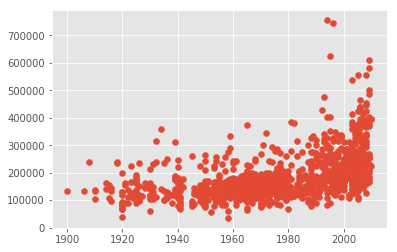

In [117]:
plt.scatter(x=df_train['GarageYrBlt'],y=df_train['SalePrice'])

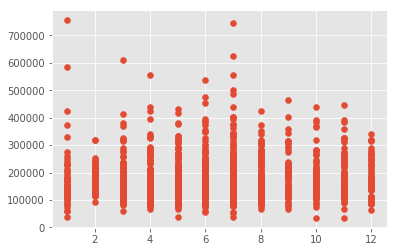

In [119]:
plt.scatter(df_train['MoSold'],y=df_train['SalePrice'])

(array([100.,  96., 126., 180., 228., 217., 109.,  56.,  77., 126.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

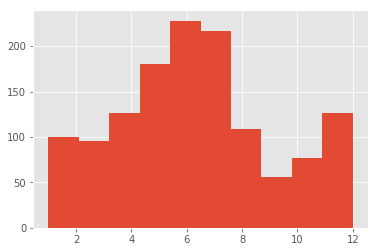

In [120]:
#$plt.hist(df_train['MoSold'])

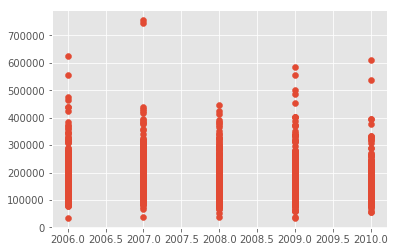

In [121]:
plt.scatter(x=df_train['YrSold'],y=df_train['SalePrice'])

(array([285.,   0., 299.,   0.,   0., 269.,   0., 305.,   0., 157.]),
 array([2006. , 2006.4, 2006.8, 2007.2, 2007.6, 2008. , 2008.4, 2008.8,
        2009.2, 2009.6, 2010. ]),
 <a list of 10 Patch objects>)

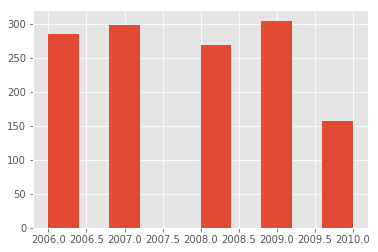

In [123]:
#$plt.hist(df_train['YrSold'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text xticklabel objects>)

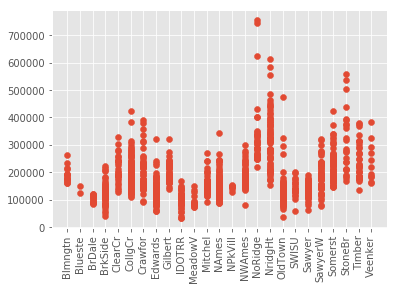

In [126]:
plt.scatter(x=df_train['Neighborhood'],y=df_train['SalePrice'])
plt.xticks(rotation=90)

(0, 200)

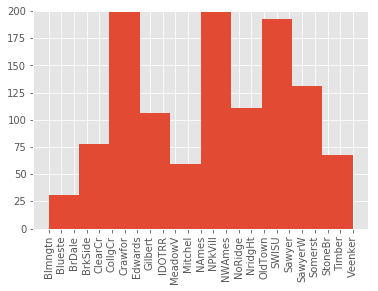

In [145]:
###$$$plt.hist(df_train['Neighborhood'])
#plt.xticks(rotation=90)
#plt.ylim(0,200)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

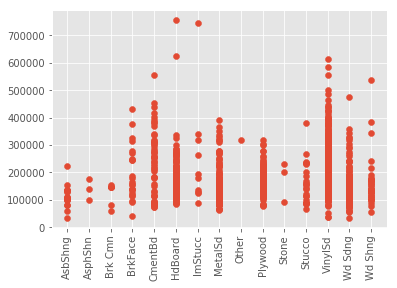

In [135]:
plt.scatter(x=df_train['Exterior2nd'],y=df_train['SalePrice'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

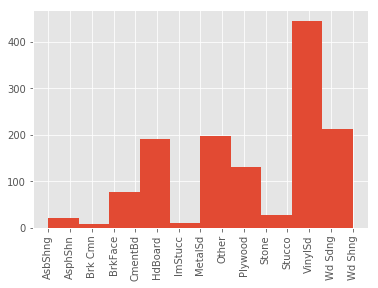

In [136]:
#$plt.hist(df_train['Exterior2nd'])
#plt.xticks(rotation=90)

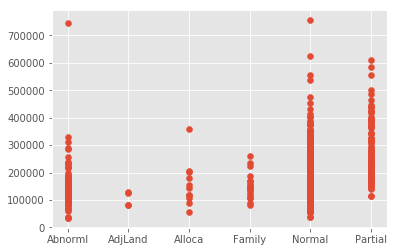

In [140]:
plt.scatter(df_train['SaleCondition'],df_train['SalePrice'])

(array([  94.,    0.,    4.,    0.,   11.,    0.,   18.,    0., 1073.,
         115.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

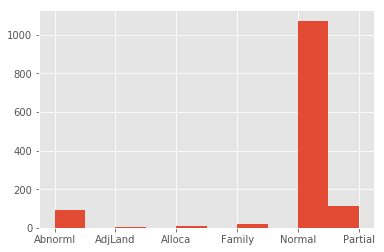

In [141]:
#$plt.hist(df_train['SaleCondition'])

In [151]:
#pd.DataFrame(df_train).set_index('Id').to_csv('Train1.csv')